In [1]:
# Libraries
'''Ploting Libraries'''
import matplotlib.pyplot as plt
import seaborn as sns

from plotly.offline import iplot, plot
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
import plotly.io as pio
pio.renderers.default = "iframe" 

sns.set_palette('RdBu')

import numpy as np
import pandas as pd
import scipy
from scipy import stats
from sklearn.preprocessing import LabelEncoder



<center><h1> IBM HR analysis</h1></center>

<center>![alkir/Thinkstock](https://compote.slate.com/images/75d251f2-6d54-4839-bfb1-96f40b237ef4.jpg) </center>

## Introduction

Hello everyone,  this notebook is an assignment in CBD Robotics internship, in order to exploit my basic acknowledge.

***The assignment concludes 2 main parts.***  
#### First, show off fundamental EDA skills, include:  
 * Visulization with matplotlib.pyplot, seaborn, and plotly
 * Missing value treatment with isnull()..
 * pd.DataFrame's methods: info(), describe(), head(), tail()..  

#### Second, statistically questions:
 * Which key factors influence attrition rates?
 * Which key factors influence satisfaction rates?

Also, the statistics  must use ***following testing***:
 * T-test  
 * ANOVA and MANOVA
 * Correlation calculation in Pearman method.

# Table of Contents

1. Take a look at the dataset
2. Missing data
3. Descriptive statistic
4. EDA
5. Statistic Tesing
 * Which key factors to Attrition?
 * Which key factors to Job Satisfaction?
6. Final verdict
7. My potential mistakes

# 1. Take a look

In [2]:
df = pd.read_csv('HR-Employee-Attrition.csv')

In [3]:
print('Observations                                   : ', df.shape[0])
print('Features -- exclude Attrition and Satisfication: ', df.shape[1] - 2)

Observations                                   :  1470
Features -- exclude Attrition and Satisfication:  33


In [4]:
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [5]:
df.tail(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1460,29,No,Travel_Rarely,468,Research & Development,28,4,Medical,1,2054,...,2,80,0,5,3,1,5,4,0,4
1461,50,Yes,Travel_Rarely,410,Sales,28,3,Marketing,1,2055,...,2,80,1,20,3,3,3,2,2,0
1462,39,No,Travel_Rarely,722,Sales,24,1,Marketing,1,2056,...,1,80,1,21,2,2,20,9,9,6
1463,31,No,Non-Travel,325,Research & Development,5,3,Medical,1,2057,...,2,80,0,10,2,3,9,4,1,7
1464,26,No,Travel_Rarely,1167,Sales,5,3,Other,1,2060,...,4,80,0,5,2,3,4,2,0,0
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [6]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

# 2. Missing data

I ran isnull(), read data desciption, manually look for any kind of missing data. There is no NaN nor any type of missing data in this set.  

*** This dataset is way so clean.***

In [7]:
print('Nan data points: ', df.isnull().sum().sum())

Nan data points:  0


# 3. Descriptive statistic

Both Attrition and JobSafisfaction are categorical, so there is just small room for descriptive statistic here, which is: ***count*** and ***percentage***.

In [8]:
df.Attrition.describe()

count     1470
unique       2
top         No
freq      1233
Name: Attrition, dtype: object

In [9]:
df.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [10]:
df.JobSatisfaction.describe(percentiles=[0.01, 0.45, 0.90])

count    1470.000000
mean        2.728571
std         1.102846
min         1.000000
1%          1.000000
45%         3.000000
50%         3.000000
90%         4.000000
max         4.000000
Name: JobSatisfaction, dtype: float64

# 4. EDA

In [11]:
# The big picture
fig = make_subplots(rows=1, cols=2,
                   specs=[[{"type": "bar"}, {"type": "domain"}]])

# Sketch smaller details
trace0 = go.Histogram(x=df['Attrition'], name='In number', marker={'color':['red', 'blue']},
                     showlegend=False)
trace1 = go.Pie(values=df['Attrition'].value_counts(), name='Percentage', labels=['No', 'Yes'],
               textinfo='label+percent')

# Add traces
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)

# Customize
fig.update(layout_title_text='<b> Attrition </b>')
fig.update_layout(showlegend=False)

# Done
fig.show()

In [12]:
# The big picture
fig = make_subplots(rows=3, cols=2,
                   specs=[[{'rowspan':3}, {"type": "domain"}],
                          [None,          {"type": "domain"}],
                          [None,          {"type": "domain"}]])

# Sketch smaller details

## The bar chart - with Yes = negative columns.
labels = ['R&D', 'Sales', 'HR']

yes = df['Department'][df.Attrition=='Yes'].value_counts()
trace_yes = go.Bar(x=labels, y=-yes, marker={'color':'red'}, showlegend=False) 

no  = df['Department'][df.Attrition=='No'].value_counts()
trace_no  = go.Bar(x=labels, y=no, marker={'color':'blue'}, showlegend=False )

## Pie 1 -- upper right
RD = df['Attrition'][df.Department=='Research & Development'].value_counts()
trace_3   = go.Pie(labels=['No', 'Yes'], values=RD, name='RD')

## Pie 2
Sales = df['Attrition'][df.Department=='Sales'].value_counts()
trace_4   = go.Pie(labels=['No', 'Yes'], values=Sales, name='Sales')

## Pie 3
HR = df['Attrition'][df.Department=='Human Resources'].value_counts()
trace_5   = go.Pie(labels=['No', 'Yes'], values=HR, name='HR')

# Add traces
fig.append_trace(trace_yes, 1, 1)
fig.append_trace(trace_no, 1, 1)

fig.append_trace(trace_3, 1, 2)
fig.append_trace(trace_4, 2, 2)
fig.append_trace(trace_5, 3, 2)

# Customize
fig.update(layout_title_text='<b> Attrition by Department </b>')

# Done
fig.show()

In [13]:
fig = px.box(df, y='MonthlyIncome', x='Gender', color='Gender', 
             points='all', 
             color_discrete_map={'Female':'red', 'Male':'Green'})

fig.update(layout_title_text='<b> Monthly Income by Gender </b>')
fig.update_layout(showlegend=False)

fig.show()

In [14]:
# The big picture
fig = make_subplots(rows=6, cols=2,
                   specs=[[{'rowspan':6}, {"type": "domain"}], # 1  --  1
                          [None,          {"type": "domain"}], # 0  --  2
                          [None,          {"type": "domain"}], # 0  --  3
                          [None,          {"type": "domain"}], # 0  --  4
                          [None,          {"type": "domain"}], # 0  --  5
                          [None,          {"type": "domain"}]])# 0  --  6

# Sketching
## Bar chart
labels=['Life Sciences', 'Medical','Marketing', 'Technical Degree', 'Other', 'Human Resources']

yes = df['EducationField'][df.Attrition=='Yes'].value_counts(ascending=False)
no = df['EducationField'][df.Attrition=='No'].value_counts(ascending=False)

fig.add_bar(y=-yes, x=labels, col=1, row=1, marker={'color':'red'},  showlegend=False)
fig.add_bar(y=no,   x=labels, col=1, row=1, marker={'color':'blue'}, showlegend=False)

## Pie chart
LS     = df['Attrition'][df.EducationField=='Life Sciences'].value_counts()
Med    = df['Attrition'][df.EducationField=='Medical'].value_counts()
Mar    = df['Attrition'][df.EducationField=='Marketing'].value_counts()
Tech   = df['Attrition'][df.EducationField=='Technical Degree'].value_counts()
Other  = df['Attrition'][df.EducationField=='Other'].value_counts()
HR     = df['Attrition'][df.EducationField=='Human Resources'].value_counts()

fig.add_pie(labels=['No', 'Yes'], values=LS,    name='LS',    col=2, row=1)
fig.add_pie(labels=['No', 'Yes'], values=Med,   name='Med',   col=2, row=2)
fig.add_pie(labels=['No', 'Yes'], values=Mar,   name='Mar',   col=2, row=3)
fig.add_pie(labels=['No', 'Yes'], values=Tech,  name='Tech',  col=2, row=4)
fig.add_pie(labels=['No', 'Yes'], values=Other, name='Other', col=2, row=5)
fig.add_pie(labels=['No', 'Yes'], values=HR,    name='HR',    col=2, row=6)

# Customize
fig.update(layout_title_text='<b> Attrition by Education Field </b>')
# Done
fig.show()

In [15]:
fig = make_subplots(rows=2, cols=2)

trace0 = go.Histogram(x=df['Department'], y=df['JobSatisfaction'], histfunc='avg')
trace1 = go.Histogram(x=df['EducationField'], y=df['JobSatisfaction'], histfunc='avg')
trace2 = go.Histogram(x=df['OverTime'], y=df['JobSatisfaction'], histfunc='avg')
trace3 = go.Histogram(x=df['MaritalStatus'], y=df['JobSatisfaction'], histfunc='avg')

fig.add_trace(trace0, 1, 1)
fig.add_trace(trace1, 1, 2)
fig.add_trace(trace2, 2, 1)
fig.add_trace(trace3, 2, 2)
#fig = px.histogram(df, x='Department', y='JobSatisfaction',  histfunc='avg')


fig.show()

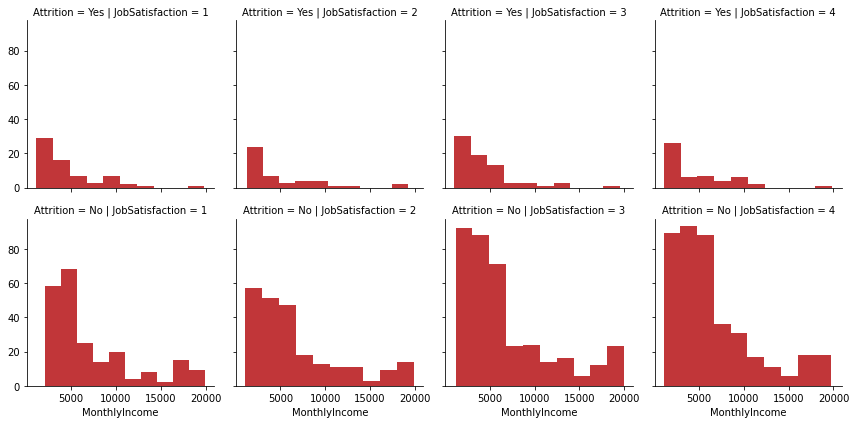

In [16]:
g = sns.FacetGrid(data=df, row = 'Attrition', col = 'JobSatisfaction')
g.map(plt.hist, 'MonthlyIncome', bins=10)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

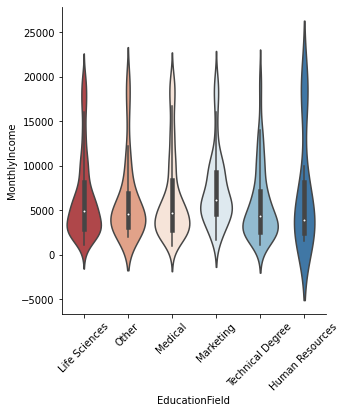

In [17]:
sns.catplot(x='EducationField', y='MonthlyIncome',  data=df,
           kind='violin')
plt.xticks(rotation=45)

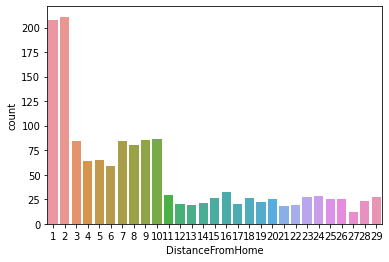

In [18]:
sns.countplot(x='DistanceFromHome', data=df)

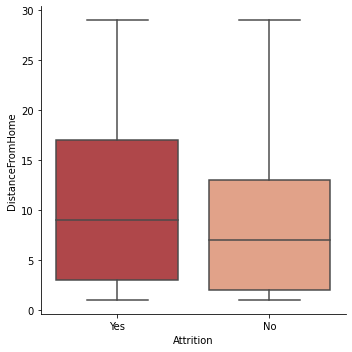

In [19]:
# DistanceFromHome -- Attrition
sns.catplot(x='Attrition', y='DistanceFromHome', data=df,
           kind='box')

In [20]:
fig = px.histogram(df, x='JobSatisfaction', color='JobSatisfaction')

fig.update_layout(title='<b> JobSatisfaction </b>',
                  xaxis={'tickmode': 'array',
                         'tickvals': [1, 2, 3, 4]})

fig.show()

# 5. Statistic Tesing


## My thoughts

### The questions:
 * Which key factors influence attrition rates?
 * Which key factors influence satisfaction rates?

### I am thinking

1. ***I have not known any how-influence measure.*** I have several basic tools of hypothesis testing: t-test, ANOVA and MANOVA, but none of them directly returns whether this influences that, just giving statistic testing of mean, variance, and so on.  

 So, I paraphrase questions which key factors influence become: In the population of feature A (ex: MonthlyIncome), *** whether Yes-Attrition mean is statiscal different from No-Attrition mean?  ***
If the differences are significant, we conclusion this features **influences** the attrition rate.


2. ***T-test downside is only working with every pair of variable***. One variable must be our target, Attrition or Satisfaction, the underconsidering features would be the other one. Therefore, it is impossible to directly apply t-test across all of features.  

 So, I make a work around. ***For *feature* in *all features*, does this feature influence Attrition or Satisfication***. Then each pair will outputs a conclusion.


3. ***ANOVA and MANOVA have drawbacks, too.*** While put a set of features under the test, they can not tell specifically which one differs from which one. They give an alert that something wrong happen, that's all.  

 
4. ***The correlation, as this measure is tailored for examining the relationship between numerical variables,*** so I would save it for *** Job Satisfication*** and its relationships.

The mention of correlation measure and numerical variables reminds to a crucial issue: datatypes. ***Which tests are suitable to apply with different datatypes?*** I will propose a solution right later.




    

## Determining statistic methods according to datatypes

To select the suitable methods, we need to answer two major questions:
* What is **datatype** of the **target**?  
* What is **datatype** of the **feature**?  

The below diagram will give us the answers.

![Workflow.jpg](https://www.upsieutoc.com/images/2020/04/13/Workflow.jpg)
 

## Which features should be analyzed?  

Having know how to choose statistic methods due to the filter, now I have to pick out a number of features put in it.  

***Running tests throughout all features is not necessary.*** If this notebook were a business project, it would be a must absolutely. However, the assignment is not a business but aiming to help to  get familiar with hypothesis testing, so I do not.


Besides, I want to know if my answers are corrent, so the analyzing features should consist:
 * ***True positive*** - features really affect Attrition and Satisfaction.
 * ***True negative*** - features do not. 
 * ***the Unknown*** - clueless, for my exploration.

Also, ***None of T-test nor ANOVA*** can handle pairs of ***a categorical target and a non-binary categorical features***, so I intently will not choose this kind of pair.


## Which features should be analyzed?  

### For the Attrition
*** True Positives *** are choosen according to [Attrition in an Organization || Why Workers Quit?](https://www.kaggle.com/janiobachmann/attrition-in-an-organization-why-workers-quit), there are:
* Over Time
* Monthly Income
* Age. 

*** True Negatives *** should be:
* Distance From Home
* Total Working Years 
* Martial Status.

*** The Unknown *** are:
* Job Level, Num Companies Worked, Years Since Last Promotion,  
* Years With Curr Manager, Training Times Last Year, Monthly Rate  
* Education, Percent Salary Hike.

### For Job Satisfication
The features are ***exactly the same*** without any clue of which True Positive, True Negative, or the Unknown is.

In [21]:
features_to_analysis =      ['OverTime',         'MonthlyIncome',         'Age',
                             'DistanceFromHome', 'TotalWorkingYears',     'MaritalStatus',
                             'JobLevel',         'NumCompaniesWorked',    'YearsSinceLastPromotion',
                             'MonthlyRate',      'TrainingTimesLastYear', 'YearsWithCurrManager',
                             'Education',        'PercentSalaryHike']
features_to_analysis.sort()
print(features_to_analysis)

['Age', 'DistanceFromHome', 'Education', 'JobLevel', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


### 1. Datatypes of Features

In [22]:
# Create table of feature datatypes.
table_datatypes = pd.DataFrame(columns=['Features', 'Datatype'])

# 1st column: Features
table_datatypes['Features'] = features_to_analysis

# 2nd column: Datatypes
table_datatypes['Datatype'] = [df[feature].dtypes for feature in features_to_analysis]

print(table_datatypes)

                   Features Datatype
0                       Age    int64
1          DistanceFromHome    int64
2                 Education    int64
3                  JobLevel    int64
4             MaritalStatus   object
5             MonthlyIncome    int64
6               MonthlyRate    int64
7        NumCompaniesWorked    int64
8                  OverTime   object
9         PercentSalaryHike    int64
10        TotalWorkingYears    int64
11    TrainingTimesLastYear    int64
12  YearsSinceLastPromotion    int64
13     YearsWithCurrManager    int64


The above table classifies:
 * *** Binary categories:*** OverTime -> needed to encode to 0 - 1 format.
 * *** Trinary categories: *** MaritalStatus -> ANOVA could be appropriate.
 * *** Nominal:*** Education and JobLevel -> should be considered numerical.
 * *** Numerical:*** All the rest. 
 

### 2. Preprocessing features

In [23]:
# Binary encoding: MaritalStatus and OverTime:
lb = LabelEncoder()

df['MaritalStatus_encoded'] = lb.fit_transform(df['MaritalStatus']).astype(int)
df['OverTime_encoded'] = lb.fit_transform(df['OverTime']).astype(int)

# Origins replaced by encoded
features_to_analysis = ['MaritalStatus_encoded' if x=='MaritalStatus' else x for x in features_to_analysis]
features_to_analysis = ['OverTime_encoded' if x=='OverTime' else x for x in features_to_analysis]

### 3. The Filter suggests methods based on Datatypes

Let's drop targets and features down the filter, we will find the way.

#### Attrition: a binary category, so:
 * All the Features to analysis: using Hypothesis testing, includes MaritalStatus and Overtime which already encoded.
 
#### Job Satisfication is orinal, but let deem it numerical for now.
 * MaritalStatus and OverTime: are partly categorical -> using Hypothesis testing.
 * All the rest: Correlation.

### 4. Which key factors to Attrition?

### Hypothesis Testing

1. ***Populations***  

 * Population Yes: All employees who 'Yes' to Attrition.
 * Population No : All employee who 'No' to Attrition.

2. ***Statements***  

For each feature in the list of undertest features.  
 * H0: Mean of Population Yes == Mean of Population No  
 * H1: Mean of Population Yes != Mean of Population No

3. ***Calculation***

In [24]:
# Split df to Yes-No Attrition
df_Attrition_yes = df[df.Attrition == 'Yes']
df_Attrition_no = df[df.Attrition == 'No']

# Run: One sample Two-sided T-test
t_statistic = []
p_value     = []

for feature in features_to_analysis:
    # t-test
    sample  = df_Attrition_yes[feature]
    popmean = df_Attrition_no[feature].mean() # mean of population
    t_stats, p = stats.ttest_1samp(sample, popmean)
           
    t_statistic.append(t_stats)
    p_value.append(p)    
    
    print('Feature: ', feature)
    print('t-statistic: %4.2f -- p-value: %4.4f \n' %(t_stats, p))

Feature:  Age
t-statistic: -6.28 -- p-value: 0.0000 

Feature:  DistanceFromHome
t-statistic: 3.13 -- p-value: 0.0020 

Feature:  Education
t-statistic: -1.33 -- p-value: 0.1836 

Feature:  JobLevel
t-statistic: -8.33 -- p-value: 0.0000 

Feature:  MaritalStatus_encoded
t-statistic: 6.91 -- p-value: 0.0000 

Feature:  MonthlyIncome
t-statistic: -8.65 -- p-value: 0.0000 

Feature:  MonthlyRate
t-statistic: 0.63 -- p-value: 0.5313 

Feature:  NumCompaniesWorked
t-statistic: 1.70 -- p-value: 0.0909 

Feature:  OverTime_encoded
t-statistic: 9.29 -- p-value: 0.0000 

Feature:  PercentSalaryHike
t-statistic: -0.55 -- p-value: 0.5845 

Feature:  TotalWorkingYears
t-statistic: -7.77 -- p-value: 0.0000 

Feature:  TrainingTimesLastYear
t-statistic: -2.56 -- p-value: 0.0112 

Feature:  YearsSinceLastPromotion
t-statistic: -1.41 -- p-value: 0.1592 

Feature:  YearsWithCurrManager
t-statistic: -7.42 -- p-value: 0.0000 



4. ***Conclusions***

In [25]:
# Create tabel
table = pd.DataFrame()
table['Features'] = features_to_analysis
table['t-statistic'] = t_statistic
table['p-value'] = p_value

# Conclusions
alpha = 0.05
table['Decisions'] = ['Rejected' if x<alpha else 'Failed to reject' for x in table['p-value']]
table['Key factors'] = ['Yes' if x=='Rejected' else 'No' for x in table['Decisions']]

# Drop not-needed
#table = table.drop(['t-statistic', 'p-value'], axis=1)

print(table[['Features', 'Decisions', 'Key factors']].sort_values(by='Key factors', ascending=False))

#print(table.sort_values(by='Decisions'))

                   Features         Decisions Key factors
0                       Age          Rejected         Yes
1          DistanceFromHome          Rejected         Yes
3                  JobLevel          Rejected         Yes
4     MaritalStatus_encoded          Rejected         Yes
5             MonthlyIncome          Rejected         Yes
8          OverTime_encoded          Rejected         Yes
10        TotalWorkingYears          Rejected         Yes
11    TrainingTimesLastYear          Rejected         Yes
13     YearsWithCurrManager          Rejected         Yes
2                 Education  Failed to reject          No
6               MonthlyRate  Failed to reject          No
7        NumCompaniesWorked  Failed to reject          No
9         PercentSalaryHike  Failed to reject          No
12  YearsSinceLastPromotion  Failed to reject          No


5. Comments  

 * ***True Positives*** - Age, MonthlyIncome, and OverTime: all correct.
 * ***True Negatives*** - DistanceFromHome, TotalWorkingYears, and MaritalStatus: the hypothesis testing considers them key factors.
 * ***For-curious features*** - Age and Years WithCurr Manager are key factors.

### 4. Which key factors to Job Satisfaction?

Look back to its distribution first.

## Hypothesis Testing for MaritalStatus and OverTime

1. ***Populations***  

 * Population: whole employees.
 * Samples:
     * Sample 1: employees who is Single   and  Yes-OverTime.
     * Sample 2: employees who is Married  and  Yes-OverTime.
     * Sample 3: employees who is Divorced and  Yes-OverTime.
     * Sample 4: employees who is Single   and  No-OverTime.
     * Sample 5: employees who is Married  and  No-OverTime.
     * Sample 6: employees who is Divorced and  No-OverTime.

In [26]:
# Preparing samples for ANOVA
population = df[['MaritalStatus', 'OverTime', 'JobSatisfaction']]

anova_samples = {}
i = 1

# Create Samples by conditions
for MS in population['MaritalStatus'].unique():
    for OT in population['OverTime'].unique():
        sample = population['JobSatisfaction'][(df.MaritalStatus==MS) & (df.OverTime==OT)]
        sample.reset_index(drop=True, inplace=True)
        anova_samples[i] = sample
        
        i += 1

2. ***Statements***  

 * H0: Means of JobSatisfaction in 6 samples are equal.  
 * H1: Existing at least one pair that breaks H0.
 
 ***Level of Significant***: 0.05

3. ***Calculation***

Test: One way ANOVA

In [27]:
f, p = stats.f_oneway(anova_samples[1],
                      anova_samples[2],
                      anova_samples[3],
                      anova_samples[4],
                      anova_samples[5],
                      anova_samples[6])

print('F-statistic: %4.2f' %(f))
print('p-value    : %4.2f' %(p))

F-statistic: 1.09
p-value    : 0.36


4. ***Conclusions***

 * p-value 0.36 > 0.05 -> ***Failed to reject*** H<sub>0</sub>: all 6 samples mean of Job Satisfaction are equal.  
 * MarituaStatus and OverTime: ***is not*** key values to JobSatisfaction

## Correlation determination for the rest of Features to Analysis

In [28]:
## Features to run correlation

# Those be analyzed already.
features_to_analysis.remove('MaritalStatus_encoded')
features_to_analysis.remove('OverTime_encoded')

# Put JobSatisfaction in to determine Correlation matrix latter
features_to_analysis.append('JobSatisfaction')

print(features_to_analysis)

['Age', 'DistanceFromHome', 'Education', 'JobLevel', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'JobSatisfaction']


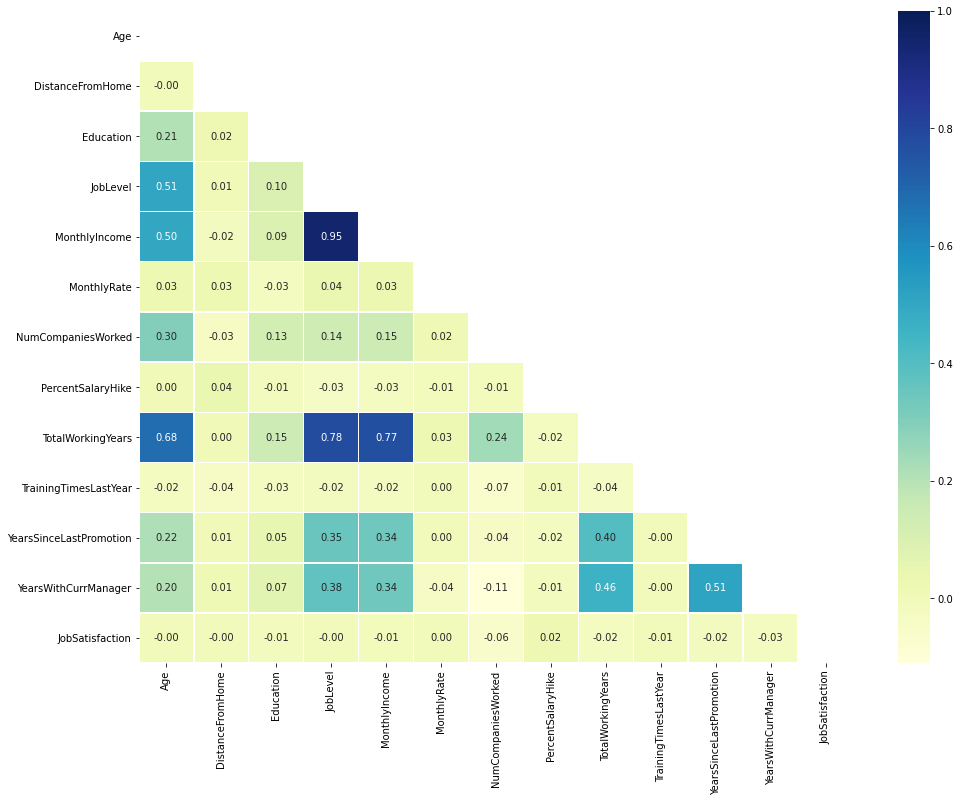

In [29]:
corr_matrix = df[features_to_analysis].corr()

# The heatmap
figure = plt.figure(figsize=(16,12))

mask = np.triu(corr_matrix) # Hide the upper part.
sns.heatmap(corr_matrix, annot=True, fmt='.2f', linewidths=0.5, cmap="YlGnBu", mask=mask)

plt.show()

### Unbelievable!!!

None of Features analysising seems to have any dang correlation to JobSatisfaction!!

# 6. Final Verdict
1. Key factors to Attrition.  

 * Age, DistanceFromHome, JobLevel,
 * MaritalStatus, MonthlyIncome, OverTime,
 * TotalWorkingYears, TrainingTimesLastYear, YearsWithCurrManager.

Though there is a drawback: we just know they influence the Attrition, but how much?? T-test can not give the answer.

2. Key factors to Job Satisfaction.

My procedure is unable to point out key factors influence the Job Satisfaction, but it indicates those does not:
 * Age, DistanceFromHome, Education,
 * JobLevel, MaritalStatus, MonthlyIncome,
 * MonthlyRate, NumCompaniesWorked, OverTime,
 * PercentSalaryHike, TotalWorkingYears, TrainingTimesLastYear, 
 * YearsSinceLastPromotion, YearsWithCurrManager

# 7. My potential mistakes
1. ***Lacking of Assumptions checking***. T-test and ANOVA working based on concrete assumptions. If the data are not suitable for them, the testing could be incorrect.


2. ***Problems with ordinal data.*** I ran ANOVA with assumption that Job Satisfaction is simply a integer, but it is not. Job Satisfaction is an ordinal, which by far different from a ninteger, so this assumption badly effects on ANOVA at certain level.